In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
df.shape


(550068, 12)

In [3]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
df.drop(['Product_Category_2','Product_Category_3', 'User_ID','Product_ID','Age'], axis=1, inplace=True)

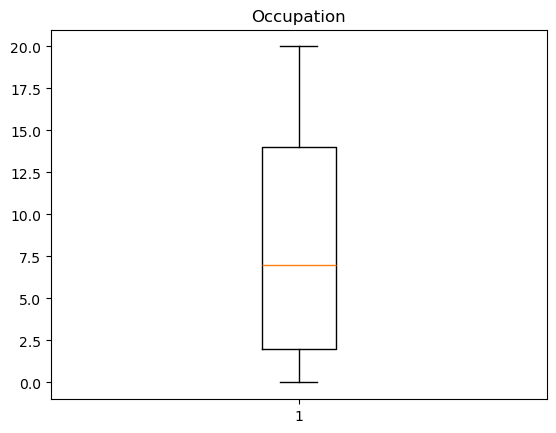

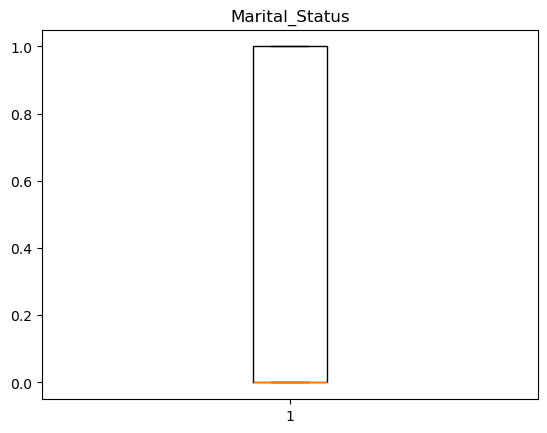

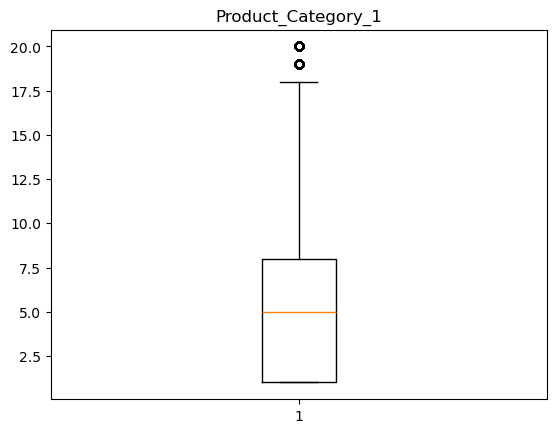

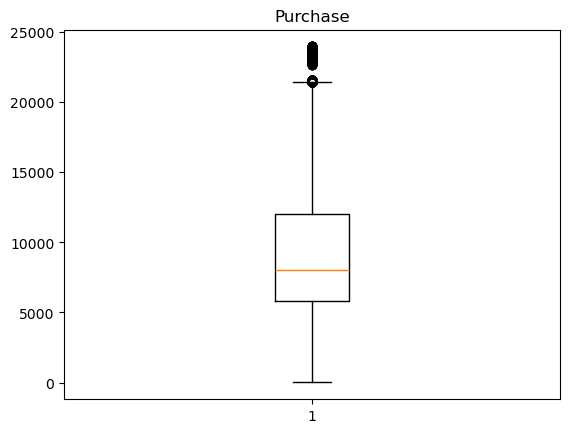

In [5]:
num = df.select_dtypes(exclude='object').columns
for i in num:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [35]:
num = df.select_dtypes(exclude='object').columns
for i in num:
    a = df[i].skew()
    print(i,a)

Occupation 0.40014010986184784
Marital_Status 0.3674372854404167
Product_Category_1 1.0257349338538029
Purchase 0.6001400037087128


C:\Users\panka\AppData\Local\Temp\ipykernel_16724\3612005415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


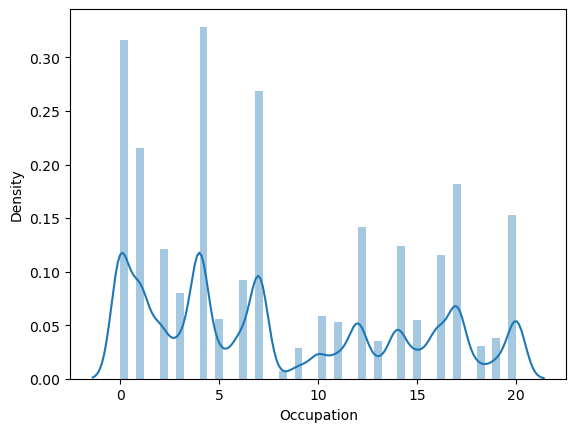

C:\Users\panka\AppData\Local\Temp\ipykernel_16724\3612005415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


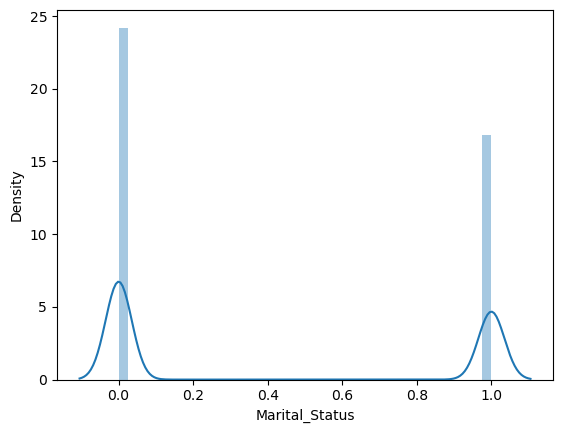

C:\Users\panka\AppData\Local\Temp\ipykernel_16724\3612005415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


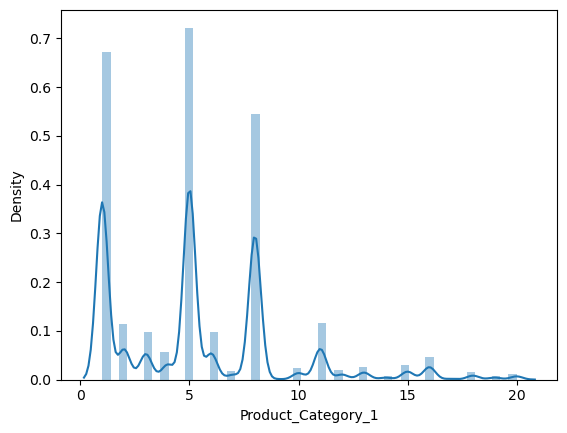

C:\Users\panka\AppData\Local\Temp\ipykernel_16724\3612005415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


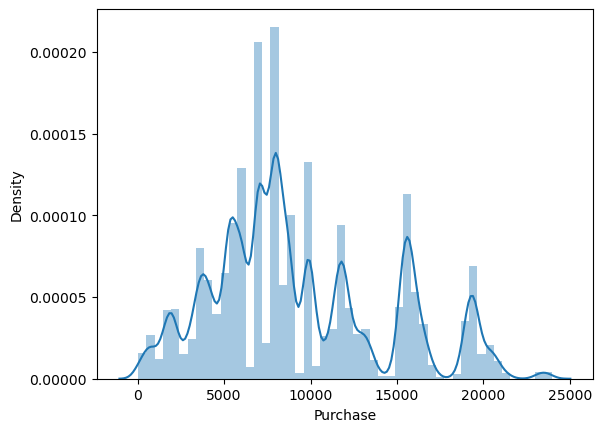

In [6]:
for i in num:
    sns.distplot(df[i])
    plt.show()

In [7]:
df.isnull().sum()
# df.head()

Gender                        0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [8]:
df.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,10,A,2,0,3,8370
1,F,10,A,2,0,1,15200
2,F,10,A,2,0,12,1422
3,F,10,A,2,0,12,1057
4,M,16,C,4+,0,8,7969


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Occupation                  550068 non-null  int64 
 2   City_Category               550068 non-null  object
 3   Stay_In_Current_City_Years  550068 non-null  object
 4   Marital_Status              550068 non-null  int64 
 5   Product_Category_1          550068 non-null  int64 
 6   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 29.4+ MB


In [10]:
cat_column = df.select_dtypes(include='object')
cat_column

,Gender,City_Category,Stay_In_Current_City_Years
0,F,A,2
1,F,A,2
2,F,A,2
3,F,A,2
4,M,C,4+
...,...,...,...
550063,M,B,1
550064,F,C,3
550065,F,B,4+
550066,F,C,2


In [ ]:
df['Stay_In_Current_City_Years'] = ['5' if i == '4+' else i for i in df['Stay_In_Current_City_Years']]

In [ ]:
df.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,10,A,2,0,3,8370
1,F,10,A,2,0,1,15200
2,F,10,A,2,0,12,1422
3,F,10,A,2,0,12,1057
4,M,16,C,5,0,8,7969


**converting categorical to numerical columns**

In [18]:
LE = LabelEncoder()
for i in cat_column:
    df[i] = LE.fit_transform(df[i])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int32
 1   Occupation                  550068 non-null  int64
 2   City_Category               550068 non-null  int32
 3   Stay_In_Current_City_Years  550068 non-null  int32
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Purchase                    550068 non-null  int64
dtypes: int32(3), int64(4)
memory usage: 23.1 MB


In [ ]:
df.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,10,0,2,0,3,8370
1,0,10,0,2,0,1,15200
2,0,10,0,2,0,12,1422
3,0,10,0,2,0,12,1057
4,1,16,2,4,0,8,7969


In [20]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1234, test_size=0.30)

In [22]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predictions = LR.predict(X_test)
y_predictions

array([7832.48162779, 9423.05207701, 9497.23094526, ..., 7656.16537827,
       6521.87911128, 8567.68771761])

In [ ]:
R2 = r2_score(y_test, y_predictions)
MSE = mean_squared_error(y_test, y_predictions)
RMSE = MSE**1/2
print("R2: ", R2)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

R2:  0.12424505162929667
MSE:  21996799.655000854
RMSE:  10998399.827500427


In [25]:
corr = df.corr()
corr

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Gender,1.000000,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.060346
Occupation,0.117291,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,-0.004515,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,0.014660,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,-0.011603,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category_1,-0.045594,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.060346,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


<Axes: >

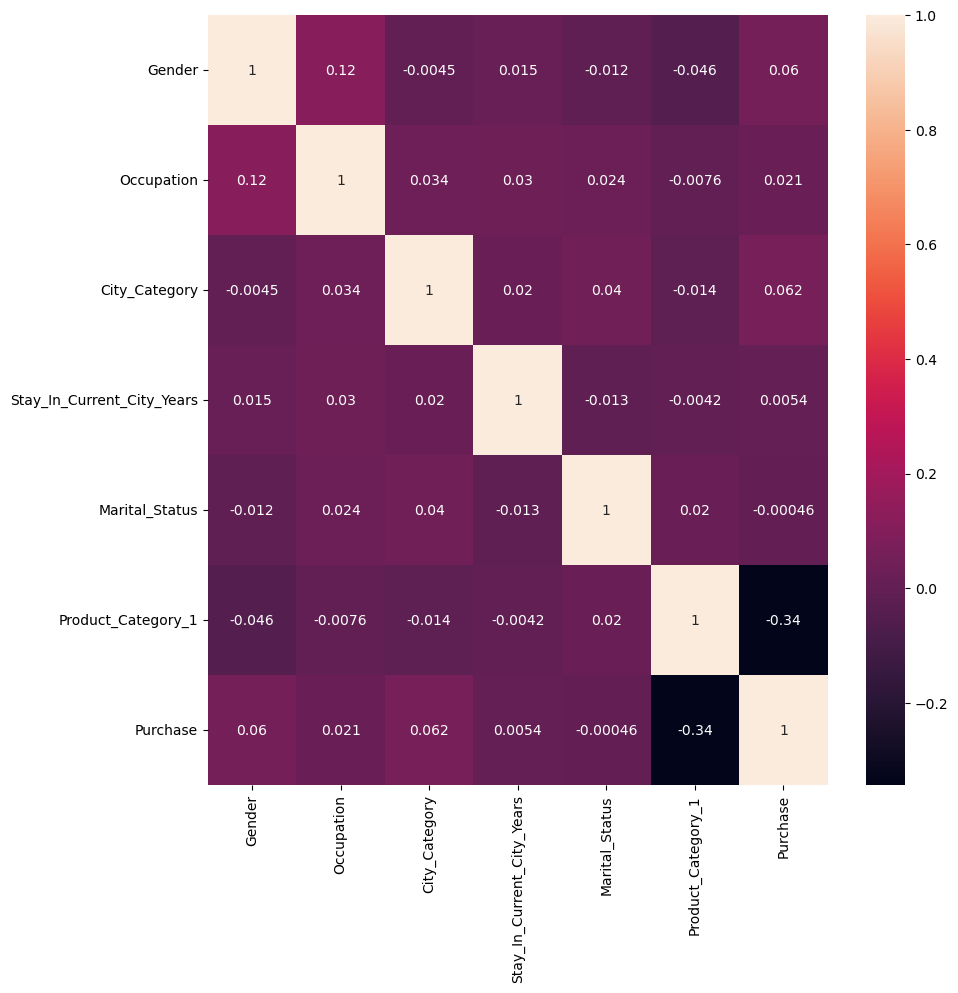

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [28]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(df, 0.10)

{'Occupation', 'Purchase'}

In [ ]:
df.drop('Product_Category_1' ,axis = 1, inplace=True)

In [ ]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1234, test_size=0.30)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predictions = LR.predict(X_test)
y_predictions

array([8922.94563867, 9097.9877321 , 9391.15486   , ..., 8684.67755063,
       8911.00169071, 9807.66013026])

In [ ]:
R2 = r2_score(y_test, y_predictions)
MSE = mean_squared_error(y_test, y_predictions)
RMSE = MSE**1/2
print("R2: ", R2)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

R2:  0.007298807363702697
MSE:  24934200.248969477
RMSE:  12467100.124484738


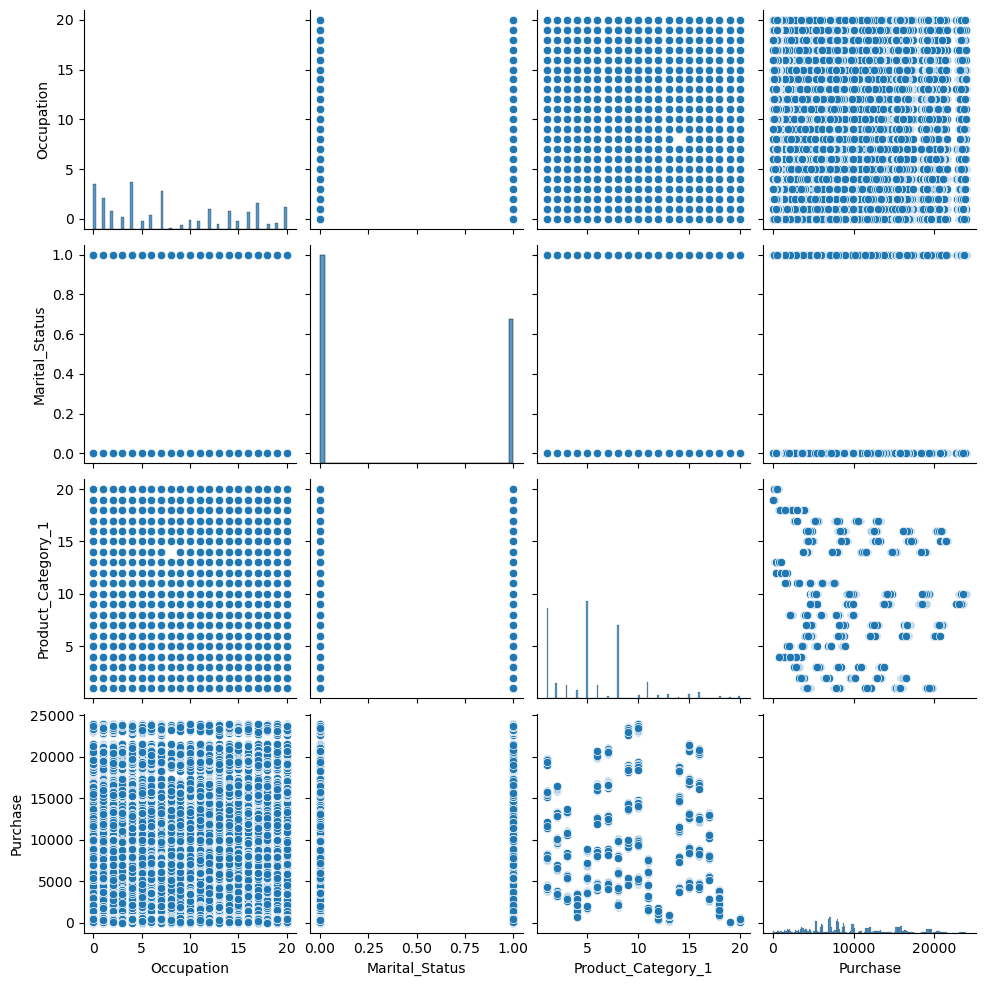

In [39]:
sns.pairplot(df)